<a href="https://colab.research.google.com/github/keerthanakkumar/stock-predictor/blob/main/ML_and_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## **MACHINE LEARNING**

Here we predict the Closing Price, Highest Price and Lowest Price using Opening price. Linear Regression model is used to implement this prediction.

GATHERING DATA

In [2]:
start='2012-01-01'
end='2022-12-21'
stock= 'GOOG'
data=yf.download(stock,start,end)
data.reset_index(inplace=True)   # reset index

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


EXPLORATORY DATA ANALYSIS

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500
2760,2022-12-20,88.730003,89.779999,88.040001,89.629997,89.629997,21976800


In [6]:
data.size

19327

In [7]:
data.shape

(2761, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2761 non-null   datetime64[ns]
 1   Open       2761 non-null   float64       
 2   High       2761 non-null   float64       
 3   Low        2761 non-null   float64       
 4   Close      2761 non-null   float64       
 5   Adj Close  2761 non-null   float64       
 6   Volume     2761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.1 KB


In [9]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2761,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2.761000e+03
mean,2017-06-28 05:55:10.539659520,55.307854,55.867984,54.756463,55.320194,55.320194,4.554107e+07
min,2012-01-03 00:00:00,13.956189,14.060299,13.861045,13.924059,13.924059,1.584340e+05
25%,2014-10-01 00:00:00,27.424706,27.659561,27.128019,27.427942,27.427942,2.503800e+07
50%,2017-06-28 00:00:00,46.452999,46.672001,46.151501,46.439999,46.439999,3.294800e+07
75%,2020-03-26 00:00:00,69.156502,69.938004,67.763496,69.418503,69.418503,5.339539e+07
max,2022-12-20 00:00:00,151.863495,152.100006,149.887497,150.709000,150.709000,4.995615e+08
std,NaN,35.776071,36.195672,35.366847,35.775091,35.775091,3.604813e+07


In [10]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# Remove unnecessary columns
data.drop(['Adj Close','Volume'], axis=1, inplace=True)

In [12]:
# Split data
open = data.iloc[:,1:-3].values   # opening price
high = data.iloc[:,-3].values     # highest price
low = data.iloc[:,-2].values      # lowest price
close = data.iloc[:,-1].values    # closing price

TRAIN TEST SPLIT

In [13]:
# closing price
open_train,open_test,close_train,close_test=train_test_split(open,close,test_size=0.30,random_state=42)

# lowest price
open_train,open_test,low_train,low_test=train_test_split(open,low,test_size=0.30,random_state=42)

# highest price
open_train,open_test,high_train,high_test=train_test_split(open,high,test_size=0.30,random_state=42)

MODEL CREATION

In [14]:
trained = {
    'Closing Price': close_train,
    'Highest Price': high_train,
    'Lowest Pricet': low_train
}

for name, y_train in trained.items():
    model=LinearRegression()
    model.fit(open_train, y_train)
    y_pred = model.predict(open_test)


PERFOMANCE EVALUATION

In [15]:
tested = {
    'Closing Price': close_test,
    'Highest Price': high_test,
    'Lowest Price': low_test
}

for price, y_test in tested.items():
  print(f"\n{price} Model Evaluation:")
  print('R2_score :',r2_score(y_test,y_pred))
  print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
  print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))


Closing Price Model Evaluation:
R2_score : 0.9988772307136781
Mean Squared Error : 1.4775791186316876
Mean Absolute Error : 0.7906217721233185

Highest Price Model Evaluation:
R2_score : 0.9981905932417927
Mean Squared Error : 2.439170529569348
Mean Absolute Error : 1.1395756857766186

Lowest Price Model Evaluation:
R2_score : 0.9996644571289188
Mean Squared Error : 0.43113021045947736
Mean Absolute Error : 0.4020376021398164


### **DEEP LEARNING**

To show a graph with actual price and predicted price. Here we use closing price for the same.

In [16]:
# Closing price as x
x = data.iloc[:,4:].values
x

array([[16.57312965],
       [16.64461136],
       [16.41372681],
       ...,
       [90.86000061],
       [89.15000153],
       [89.62999725]])

In [17]:
# Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(x)
scaled

array([[0.01936668],
       [0.01988927],
       [0.01820133],
       ...,
       [0.56245915],
       [0.54995778],
       [0.55346691]])

TRAIN TEST SPLIT

In [18]:
train_size = int(len(scaled) * 0.80)
test_size = len(scaled)-train_size
train_data, test_data = scaled[0:train_size,:], scaled[train_size-100:len(scaled),:]

In [19]:
time_step = 100
def create_sequences(data, time_step):
    x, y = [], []
    for i in range(len(data) - time_step):
        x.append(data[i : (i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

In [20]:
x_train, y_train = create_sequences(train_data, time_step)
x_test, y_test = create_sequences(test_data, time_step)

In [21]:
# sample,time_steps,features
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

MODEL CREATION

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50,return_sequences = True,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(units=25,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(units=1))

In [23]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [24]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
66/66 [==============================] - 34s 254ms/step - loss: 0.0121
Epoch 2/5
66/66 [==============================] - 7s 104ms/step - loss: 0.0032
Epoch 3/5
66/66 [==============================] - 8s 128ms/step - loss: 0.0029
Epoch 4/5
66/66 [==============================] - 7s 104ms/step - loss: 0.0025
Epoch 5/5
66/66 [==============================] - 8s 128ms/step - loss: 0.0022


In [25]:
# predict value
pred = model.predict(x_test)

18/18 [==============================] - 1s 29ms/step


In [26]:
# inverse scaler
pred = scaler.inverse_transform(pred)

PLOT GRAPH TO COMPARE ACTUAL CLOSING PRICE AND PREDICTED CLOSING PRICE

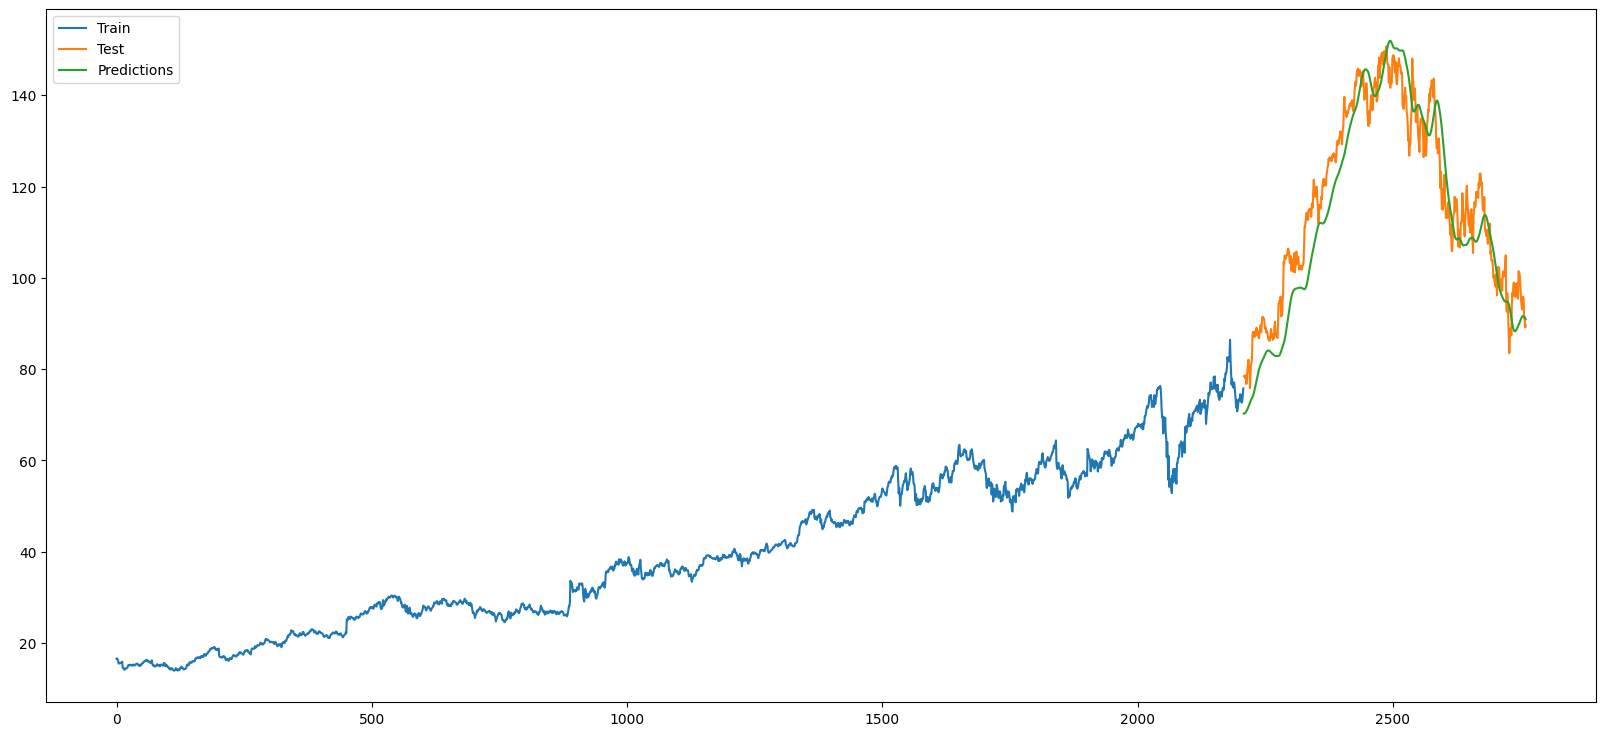

In [27]:
 # plot graph
train = data[:train_size].copy()
test = data[train_size:].copy()
test.insert(loc=5,
            column = 'pred',
            value=pred)

plt.figure(figsize=(20,9))
plt.plot(train.index,train['Close'])
plt.plot(test.index,test[['Close','pred']])
plt.legend(['Train','Test','Predictions'],loc='upper left')

In [28]:
# create new columns of profit and loss
predictedclose = test['pred'].to_numpy()
openvalue = test['Open'].to_numpy()

# if predicted value is greater than opening value you can make a trade that day
Trademade = predictedclose > openvalue

profit =[]
loss=[]
for k in range(0,len(Trademade)):
  if Trademade[k] == True:
    profit.append(predictedclose[k] - openvalue[k])
  else:
    profit.append(0)
  if Trademade[k] == False:
    loss.append(predictedclose[k] - openvalue[k])
  else:
    loss.append(0)

In [29]:
test.insert(loc = 6,
            column = 'Trade Made',
            value=Trademade)
test.insert(loc=7,
            column='Profit',
            value=profit)
test.insert(loc=8,
            column='Loss',
            value=loss)

In [30]:
test

,Date,Open,High,Low,Close,pred,Trade Made,Profit,Loss
2208,2020-10-12,77.150002,79.693001,76.628502,78.457497,70.290321,False,0.000000,-6.859680
2209,2020-10-13,79.186501,79.500000,78.160004,78.584000,70.258369,False,0.000000,-8.928131
2210,2020-10-14,78.929497,79.384201,77.526497,78.403999,70.298897,False,0.000000,-8.630600
2211,2020-10-15,77.357498,78.755249,77.251503,77.956497,70.405663,False,0.000000,-6.951836
2212,2020-10-16,78.292503,79.056503,78.150002,78.650497,70.564590,False,0.000000,-7.727913
...,...,...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,91.584251,False,0.000000,-3.955750
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.513298,False,0.000000,-2.026703
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,91.383865,True,0.183868,0.000000
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,91.192352,True,0.312355,0.000000


Here you can notice that trade id made when there is profit else going into trade is not recommended

In [31]:
print('Profit :', sum((1000/openvalue)*profit))

Profit : 7117.255483290449


When you invest an amount of 1000, this the profit you will recieve